<a href="https://colab.research.google.com/github/hastman/03-MAIR-Algoritmos-de-Optimizacion/blob/master/Angel_Lopez_Gomez_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Guiada 3 de Algoritmos de Optimización - Ángel López Gómez 

 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1MNg2Dj6HgSHiCS2SpuFuejWyWfW915k1)

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

def dibujar_grafico(Nodos,Aristas):
  g= nx.Graph()
  g.add_nodes_from(Nodos)

  aristas = Aristas + [(70,1)]
  g.add_edges_from(aristas)

  labels = {}
  for idx,node in enumerate(g.nodes()):
    labels[node]=idx
  nx.draw_random(g,node_color='y',edge_color='#909090',node_size=500,labels=labels)


## Preparación Entorno

1. Instalación de librerias necesarias
2. Descarga de juego de datos
3. Instalación y carga de los módulos TSP
4. Cargar datos del problema
5. Funciones generales

In [2]:
#1
!pip install request

In [3]:
#2
import urllib.request

file = "swiss42.tsp"

urllib.request.urlretrieve("http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp",file)

('swiss42.tsp', <http.client.HTTPMessage at 0x7f9b3b2ee0b8>)

In [4]:
#3
!pip install tsplib95

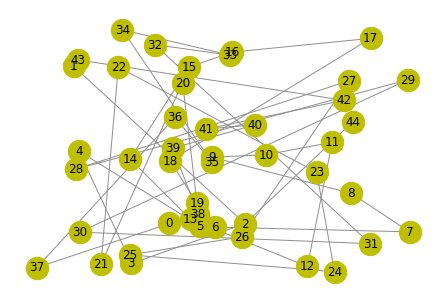

In [5]:
#4
import tsplib95
import random
import math

problem = tsplib95.load_problem(file)

Nodos = list(map(lambda x:problem.get_display(x),problem.get_nodes()))

Aristas = list(map(lambda x:(x,x+1),problem.get_nodes()))

dibujar_grafico(Nodos,Aristas)



In [0]:
#5
def crear_solucion(Nodos):
  solucion = [0]
  for i in range(len(Nodos)-1):
    solucion = solucion + [random.choice(list(set(Nodos) - set({0})  - set(solucion)  ))]
  return solucion

def distancia(a,b,p):
  return p.wfunc(a,b)

def distancia_total(sol,p):
  distancia_total = 0
  for i in range(len(sol)-1):
    distancia_total += distancia(sol[i],sol[i+1],p)
  return distancia_total+ distancia(sol[len(sol)-1],sol[0],p)

## Búsqueda Aleatoria

In [7]:
def busqueda_aleatoria(p,N):

  Nodos = list(p.get_nodes())

  mejor_solucion = []
  mejor_distancia = 10e100

  for i in range(N):
    solucion = crear_solucion(Nodos)
    distancia_solucion = distancia_total(solucion,p)
    if distancia_solucion < mejor_distancia:
      mejor_solucion = solucion
      mejor_distancia = distancia_solucion
  
  print("La mejor solución encontrada es {0} ".format(mejor_solucion))
  print("Con una distancia total de {0} ".format(mejor_distancia))
  return

busqueda_aleatoria(problem,100)


La mejor solución encontrada es [0, 5, 3, 34, 18, 37, 35, 1, 13, 7, 4, 6, 14, 19, 30, 26, 10, 39, 8, 12, 9, 29, 27, 23, 38, 20, 17, 32, 16, 28, 11, 33, 15, 36, 22, 41, 24, 21, 31, 25, 40, 2] 
Con una distancia total de 4231 


## Búsqueda Local

In [8]:
def genera_vecina(p,solucion):
  mejor_solucion = []
  mejor_distancia = 10e100

  for i in range(1,len(solucion)-1):
    for j in range(i+1,len(solucion)):
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
      distancia_vecina = distancia_total(vecina,p)
      if distancia_vecina <= mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina
  return mejor_solucion


def busqueda_local(p,N):
  
  Nodos = list(p.get_nodes())
  mejor_solucion = []
  mejor_distancia = 10e100
  solucion_referencia = crear_solucion(Nodos)

  for i in range(N):
    vecina = genera_vecina(p,solucion_referencia)
    distancia_vecina = distancia_total(vecina,p)
    if distancia_vecina <= mejor_distancia:
      mejor_solucion = vecina
      mejor_distancia = distancia_vecina
    
    solucion_referencia = vecina
  
  print("La mejor solución encontrada es {0} ".format(mejor_solucion))
  print("Con una distancia total de {0} ".format(mejor_distancia))
  return


busqueda_local(problem,100)


La mejor solución encontrada es [0, 17, 36, 35, 38, 22, 30, 32, 29, 9, 8, 10, 41, 23, 40, 24, 21, 39, 13, 19, 5, 4, 3, 2, 27, 28, 25, 11, 12, 18, 26, 6, 1, 7, 14, 16, 15, 37, 31, 20, 33, 34] 
Con una distancia total de 1835 


## Reconocimiento Simulado

In [9]:
def genera_vecina_aleatoria(solucion):
  i = random.choice(range(1,len(solucion)))
  j = random.choice(list(set(range(1,len(solucion)))-{i}))
  if j<i:
    i,j=j,i
  vecina = list(solucion[:i]+[solucion[j]]+solucion[i+1:j]+[solucion[i]]+solucion[j+1:])
  return vecina

def probabilidad(T,d):
  return random.random() <= math.exp(-1*d/T)

def bajar_temperatura(T):
  #descenso exponencial
  return T*.999

def reconocimiento_simulado(p,T):
  Nodos = list(p.get_nodes())
  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia,p)
  
  mejor_solucion = []
  mejor_distancia = 10e100

  while T>1:    
    vecina = genera_vecina_aleatoria(solucion_referencia)
    distancia_vecina = distancia_total(vecina,p)
    if distancia_vecina < mejor_distancia:
      mejor_solucion = vecina
      mejor_distancia = distancia_vecina
    
    prob = probabilidad(T,abs(distancia_referencia-distancia_vecina))    
    if distancia_vecina < distancia_referencia or prob:
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina
    T = bajar_temperatura(T)
  
  print("La mejor solución encontrada es {0} ".format(mejor_solucion))
  print("Con una distancia total de {0} ".format(mejor_distancia))
  return

reconocimiento_simulado(problem,100000)
    

La mejor solución encontrada es [0, 8, 23, 41, 25, 11, 12, 5, 14, 16, 15, 37, 7, 6, 21, 39, 24, 40, 9, 10, 18, 13, 19, 26, 4, 2, 27, 3, 1, 17, 36, 35, 31, 32, 28, 29, 30, 22, 38, 34, 33, 20] 
Con una distancia total de 1851 


## Colonia de hormigas

In [22]:
import numpy 

def Add_Nodo(p,H,T):    
  unvisited = list(set(range(1,len(Nodos)))-set(H))      
  return random.choice(unvisited)

def Add_Nodo_Prob(p,H,T,i,alpha,beta):  
  Nodos = list(p.get_nodes())
  prob = []
  unvisited = list(set(range(1,len(Nodos)))-set(H))  
  for j,unvisited_city in enumerate(unvisited):
    numerator = T[i][j]**alpha*(1/distancia(H[i],unvisited_city,p)**beta)
    summation = sum( T[i][k]**alpha*(1/distancia(H[i],u_v,p)**beta) for k,u_v in enumerate(unvisited)  )
    p_ij = numerator/float(summation)
    prob.append(p_ij) 
  
  return numpy.random.choice(unvisited,1,prob)[0]

def Incrementa_Feromona(p,T,H):
  for i in range(len(H)-1):
    T[H[i]][H[i+1]] += 1000/distancia_total(H,p)
  return T

def Evapora_Feromonas(p,T):
  Nodos = list(p.get_nodes())
  T =[[max(T[i][j]-0.3,1) for i in range(len(Nodos))] for j in range(len(Nodos))]
  return T

def hormigas(p,N,prob=False,alpha=0,beta=0):

  Nodos = list(p.get_nodes())
  Tipo_Ejecucion = "Probabilisticos" if prob else "Random"

  #Inicializa las aristas con valor de 1 feromona
  T = [[1 for _ in range(len(Nodos))] for _ in range(len(Nodos))]

  Hormiga = [[0] for _ in range(N)]
  

  for h in range(N):
    for i in range(len(Nodos)-1):
      Nuevo_Nodo = Add_Nodo_Prob(p,Hormiga[h],T,i,alpha,beta) if prob else Add_Nodo(p,Hormiga[h],T)
      Hormiga[h].append(Nuevo_Nodo)
    
    T = Incrementa_Feromona(p,T,Hormiga[h])
    T = Evapora_Feromonas(p,T)

  
  mejor_solucion = []
  mejor_distancia = 10e100

  for h in range(N):
    distancia_actual = distancia_total(Hormiga[h],p)
    if distancia_actual < mejor_distancia:
      mejor_distancia = distancia_actual
      mejor_solucion = Hormiga[h]
  print("La mejor solución encontrada es {0} usando ejecución {1}".format(mejor_solucion,Tipo_Ejecucion))
  print("Con una distancia total de {0} usando ejecución {1}".format(mejor_distancia,Tipo_Ejecucion))
  return

hormigas(problem,100)
hormigas(problem,100,True,5,2)


La mejor solución encontrada es [0, 41, 8, 22, 9, 29, 16, 13, 27, 39, 38, 32, 2, 35, 5, 26, 36, 7, 4, 21, 24, 33, 37, 30, 6, 23, 34, 20, 3, 19, 12, 15, 17, 25, 10, 40, 28, 31, 11, 18, 14, 1] usando ejecución Random
Con una distancia total de 4111 usando ejecución Random
La mejor solución encontrada es [0, 19, 14, 37, 29, 10, 25, 34, 20, 4, 35, 23, 11, 40, 9, 1, 31, 13, 18, 39, 33, 22, 38, 32, 36, 16, 5, 12, 6, 24, 8, 41, 21, 26, 3, 15, 30, 27, 28, 7, 2, 17] usando ejecución Probabilisticos
Con una distancia total de 4003 usando ejecución Probabilisticos
